# An analysis of our electrical consumption
## Hypothesis:
1. Consumption is higher on weekend vs weekdays
1. Sunshine days will have less net consumption (leverage different data frame)
1. Winter months (due to lower sunshine hours) will have higher net consumption than summer months

## Questions: 
1. Would a battery make any difference and if so, then how much?
1. Are there months/days that the battery would not get used


## Ideas
1. Count the amount of 0 net consumption per day 

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
date_parser = lambda x: pd.datetime.strptime(x, '%Y-%m-%d %H:%M:%S')
#consumption = pd.read_csv('../data/elforbrug/elforbrug_2020_2021.csv',delimiter=';',parse_dates=['Fradato'], decimal=',')
electrical_gateway = pd.read_csv('../data/elforbrug/Meterdata.csv',delimiter=';',parse_dates=['Fradato'], decimal=',', dayfirst=True)

#Filter out non-consumption
consumption = electrical_gateway.loc[electrical_gateway['MålepunktsID'] == 571313179100308524]

len(consumption.index)

consumption['HourOfDay'] = consumption['Fradato'].dt.hour
consumption['Month'] = consumption['Fradato'].dt.month
consumption['Year'] = consumption['Fradato'].dt.year
consumption['Date'] = consumption['Fradato'].dt.date
consumption.tail()

/var/folders/l7/_8vcgcf9421_1drcl53nf84h0000gn/T/ipykernel_42486/2687947237.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  consumption['HourOfDay'] = consumption['Fradato'].dt.hour
/var/folders/l7/_8vcgcf9421_1drcl53nf84h0000gn/T/ipykernel_42486/2687947237.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  consumption['Month'] = consumption['Fradato'].dt.month
/var/folders/l7/_8vcgcf9421_1drcl53nf84h0000gn/T/ipykernel_42486/2687947237.py:16: SettingWithCopyWarning: 
A value is trying to be set on a 

,MålepunktsID,Fradato,Til_dato,Forbrug,Måleenhed,Kvalitet,Type,HourOfDay,Month,Year,Date
33402,571313179100308524,2021-10-15 19:00:00,15-10-2021 20:00:00,0.47,KWH,Målt,Tidsserie,19,10,2021,2021-10-15
33403,571313179100308524,2021-10-15 20:00:00,15-10-2021 21:00:00,0.30,KWH,Målt,Tidsserie,20,10,2021,2021-10-15
33404,571313179100308524,2021-10-15 21:00:00,15-10-2021 22:00:00,0.32,KWH,Målt,Tidsserie,21,10,2021,2021-10-15
33405,571313179100308524,2021-10-15 22:00:00,15-10-2021 23:00:00,0.38,KWH,Målt,Tidsserie,22,10,2021,2021-10-15
33406,571313179100308524,2021-10-15 23:00:00,16-10-2021 00:00:00,0.33,KWH,Målt,Tidsserie,23,10,2021,2021-10-15


# Overall consumption
Let's see how the consumption has developed over time.
- Compare years/months to each other
- Identify the trend
- Average per day

Year,2017,2018,2019,2020,2021
Month,,,,,
1,NaN,349.63,383.10,401.11,507.06
2,NaN,274.25,292.57,351.78,447.34
3,NaN,297.26,264.51,294.66,409.78
4,NaN,192.16,196.00,245.36,302.39
5,NaN,172.41,217.18,244.23,242.47
6,NaN,118.03,165.35,201.21,191.69
7,NaN,174.85,184.12,237.00,212.20
8,NaN,182.82,214.04,234.14,250.77
9,NaN,222.87,258.87,281.17,285.05


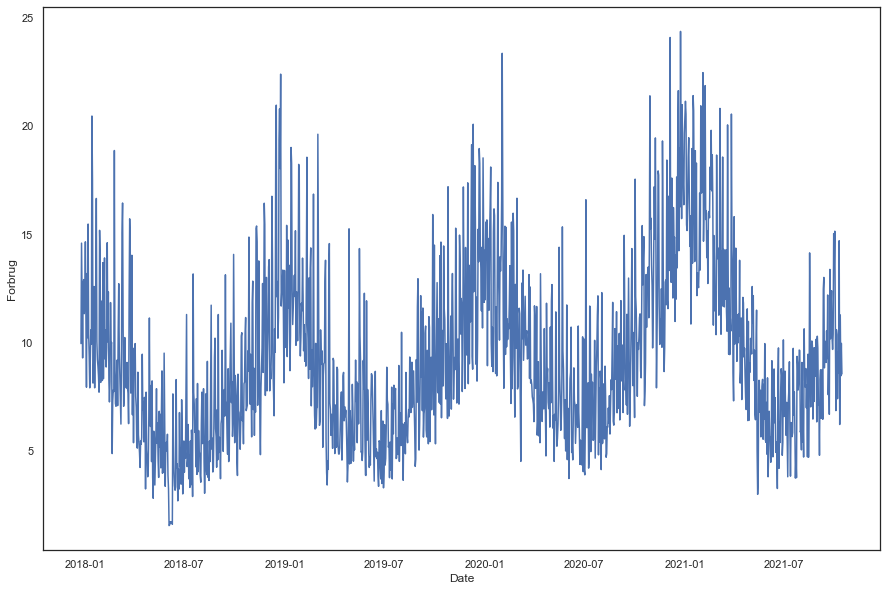

In [27]:
#Start with aggregating the data to day-level
test = pd.unique(consumption['Date'])

dayconsumption = consumption.groupby('Date').agg({'Forbrug':'sum'})

#let's plot that graph and see how bad it looks
#dayconsumption.plot()
#f, ax = plt.subplots(figsize=(15, 10))
sns.lineplot(x='Date', y='Forbrug', data=dayconsumption, ax=ax)

monthconsumption = pd.pivot_table(consumption,values='Forbrug',index=['Month'],columns='Year',aggfunc=np.sum)
#monthconsumption



# Look at hour of day for consumption trends

## Visualise consumption distribution for a single hour slice of the day

<AxesSubplot:xlabel='Forbrug', ylabel='Density'>

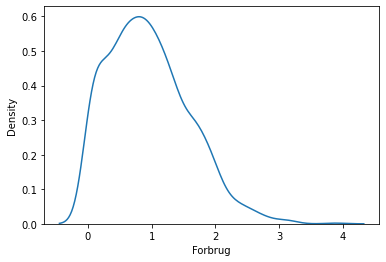

In [2]:
singlesliceofday = consumption[consumption['HourOfDay'] == 17]
sns.kdeplot(data=singlesliceofday, x='Forbrug')

### Trying to make a ridgeplot
This is to see the dispertion of consumption for each hour slice. Also they look _awesome_!

**Insight**: Hours 3 & 4 have two destinct peaks that might be worth understanding.

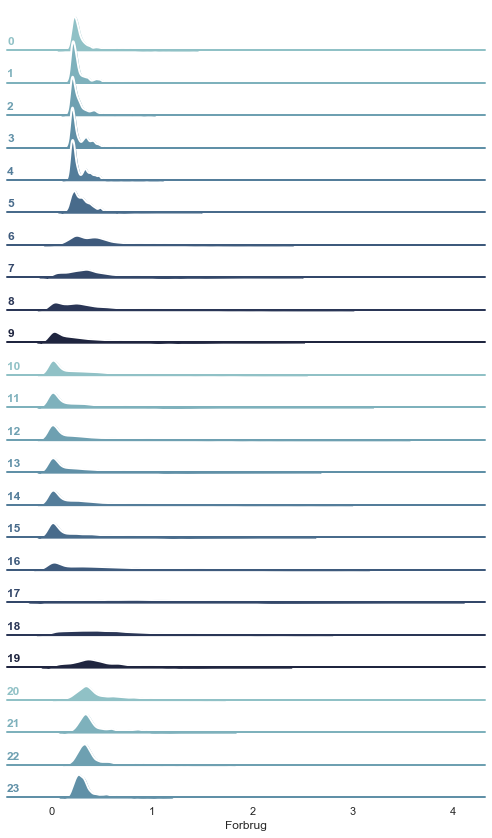

In [4]:
#https://seaborn.pydata.org/examples/kde_ridgeplot.html
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(consumption, row='HourOfDay', hue='HourOfDay', aspect=15, height=.5, palette=pal)

# g.map(sns.kdeplot, "x", bw_adjust=.5, clip_on=False,fill=True, alpha=1, linewidth=1.5)
#sns.kdeplot(data=singlesliceofday, x='Forbrug')
g.map(sns.kdeplot, 'Forbrug', bw_adjust=.5, clip_on=False,fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, 'Forbrug', clip_on=False, color="w", lw=2, bw_adjust=.5)

g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)

# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)


g.map(label, 'Forbrug')

# Set the subplots to overlap
g.figure.subplots_adjust(hspace=-.25)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)

Do the same with Violin for higher fidelity?

## Understanding how share of consumption is split by day (for all days)

In [ ]:
aggrPerHour = consumption.pivot_table(index = ['HourOfDay'], values = 'Forbrug', aggfunc=np.sum )
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(aggrPerHour, annot=True, fmt='.2f', linewidths=.5, ax=ax)

## Show heatmap of consumption split on day of week (0 = Monday) and hour of day
Here showing average

In [ ]:

sns.set_theme(style="darkgrid")

#Annotate day of week
consumption['NamedDayOfWeek'] = consumption['Fradato'].dt.day_name()
consumption['DayOfWeek'] = consumption['Fradato'].dt.dayofweek

conspivot = consumption.pivot_table(index = ['HourOfDay'], columns =['DayOfWeek'], values = 'Forbrug', aggfunc=np.average )

f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(conspivot, annot=False, fmt='f', linewidths=.5, ax=ax)

Here showing aggregate value

In [ ]:
conspivot = consumption.pivot_table(index = ['HourOfDay'], columns =['DayOfWeek'], values = 'Forbrug', aggfunc=np.sum )

f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(conspivot, annot=True, fmt='.2f', linewidths=.5, ax=ax)

That was sad. :-(


# Now looking for spots with ZERO net consumption
This is what we are here for! 

In [28]:
zeroCons = consumption[consumption['Forbrug'] == 0]

print('There are ' + str(len(zeroCons.index)) + ' hour slices with **ZERO** net consumption!!!')
print('That is ' + str(len(zeroCons.index)/len(consumption.index)*100) + '% !!!')

There are 1343 hour slices with **ZERO** net consumption!!!
That is 4.020115544646331% !!!


Lets look at when they fall

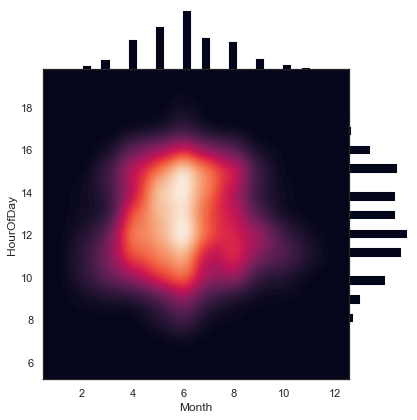

In [30]:
#https://seaborn.pydata.org/examples/smooth_bivariate_kde.html

g = sns.JointGrid(data=zeroCons, x='Month', y='HourOfDay', space=0)
g.plot_joint(sns.kdeplot,
             fill=True, 
             thresh=0, levels=100, cmap="rocket")
g.plot_marginals(sns.histplot, color="#03051A", alpha=1, bins=25)

What does the consumption look like just after these famed **ZERO** consumption periods? 

If they are low then maybe a battery could tide us over and save us some money! 

## Let's look at almost zero consumption
Maybe there are many more?

There are 5351 hour-slices with less than 100W net consumption!!!
That is 16.01760110156554% !!!


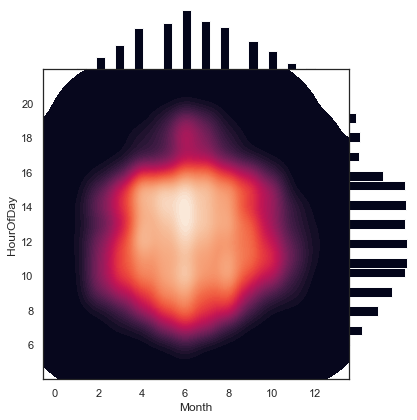

In [29]:
almostzero = consumption[consumption['Forbrug'] < 0.1]
print('There are ' + str(len(almostzero.index)) + ' hour-slices with less than 100W net consumption!!!')
print('That is ' + str(len(almostzero.index)/len(consumption.index)*100) + '% !!!')

g = sns.JointGrid(data=almostzero, x='Month', y='HourOfDay', space=0)
g.plot_joint(sns.kdeplot,
             fill=True, 
             thresh=0, levels=100, cmap="rocket")
g.plot_marginals(sns.histplot, color="#03051A", alpha=1, bins=25)